In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from astropy.io import ascii
from astropy.table import Table
from tqdm import tqdm
from astropy.convolution import convolve, Gaussian1DKernel, Box1DKernel
import numpy.ma as ma
from sqlalchemy import text
import pandas as pd
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.ticker as mticker
from scipy import stats
import pickle


In [2]:
loc = '/Users/allybaldelli/Desktop/AMNH-stuff/Doublet-Quantifiers'
sys.path.append(os.path.abspath(loc))

# Importing scripts needed
from Doublet_Quantifiers.curvefit import *
from Doublet_Quantifiers.models import *

mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally'
sys.path.append(os.path.abspath(mypath))

from functions.data_tools import *
from functions.plotting_tools import *

In [3]:
# files of data
files = [f for f in os.listdir(mypath + '/diamondback-data/t1500/')]
files.remove('.DS_Store')

In [4]:
# getting data into usable format 
data_dict = files_to_spec(files)
df, convolve_data_dict = spec_to_parameter(data_dict)

creating dictionary of spectra


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:04<00:00,  7.45it/s]


convolving and fitting spectra


<Figure size 640x480 with 0 Axes>

In [6]:
# pickling the data produced above

# df.to_pickle(mypath + "/diamondback-data/pickle_files/t1500_parameters_df.pkl")

# with open(mypath+'/diamondback-data/pickle_files/t1500_convolve_data_dict.pkl', 'wb') as handle:
#     pickle.dump(convolve_data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open(mypath+'/diamondback-data/pickle_files/t1500_raw_data_dict.pkl', 'wb') as handle:
#     pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Plotting

Text(0.5, 0.98, 'P-Voigt Parameters vs. Gravity and Clouds \n T=1500K')

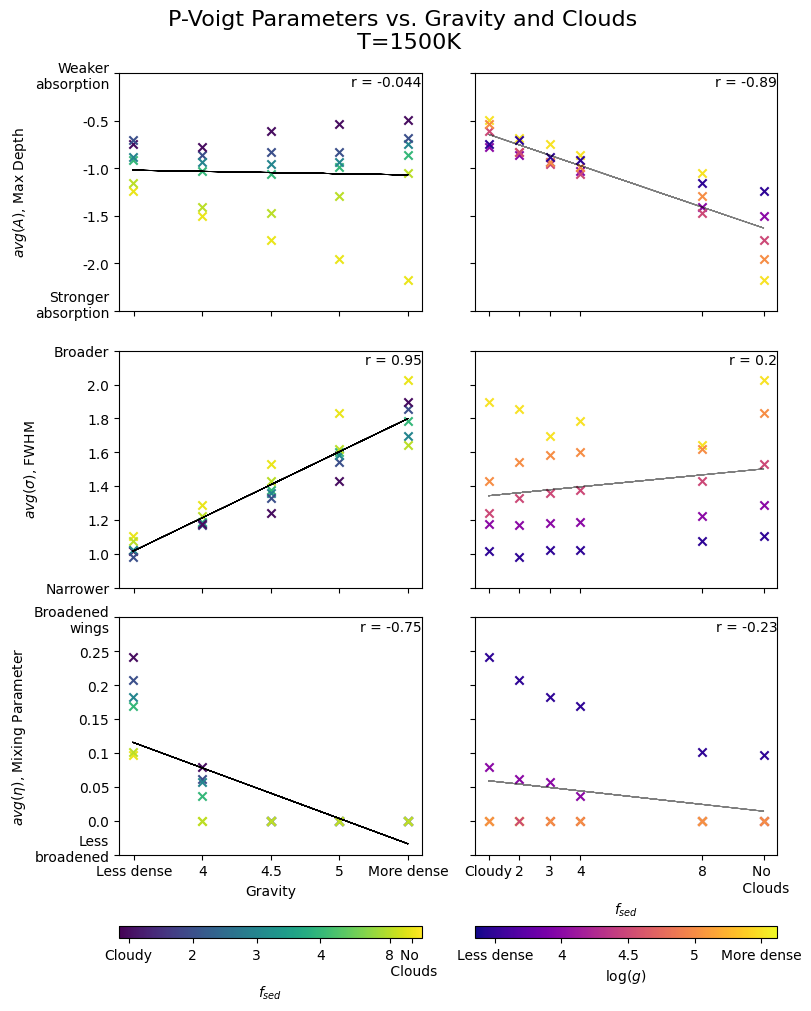

In [7]:
# plotting
lines_TF = False

fig = plt.figure(figsize=(8, 10), constrained_layout=True)

gs = fig.add_gridspec(4, 2, height_ratios=[1, 1, 1, 0.05], width_ratios=[1, 1])

ax = [[fig.add_subplot(gs[i, 0]), fig.add_subplot(gs[i, 1])] for i in range(3)]
########################################################################################
# Plotting each data points
# A
plot_parameter_vs_logg_fsed(ax[0][0], ax[0][1], (df.A1 + df.A2)/2,
               df.logg, df.clouds, r"$avg(A)$, Max Depth", lines = lines_TF)
# if lines:
#     for grav in logg_values:
#         m, b = np.polyfit(df[df.logg == grav].clouds.values,
#                           (df[df.logg == grav].A1 + df[df.logg == grav].A2)/2, 1)
#         ax[0][1].plot(df.clouds, df.clouds*m + b, color=logg_colors(norm_g(grav)),
#                       linewidth=.7, alpha=.5)
#     for f in fsed_values:
#         m, b = np.polyfit(df[df.clouds == f].logg.values,
#                           (df[df.clouds == f].A1 + df[df.clouds == f].A2)/2, 1)
#         ax[0][0].plot(df.logg, df.logg*m + b, color=fsed_colors(norm_f(f)),
#                       linewidth=.7, alpha=.5)

# FWHM
plot_parameter_vs_logg_fsed(ax[1][0], ax[1][1], (df.FWHM1 + df.FWHM2)/2,
               df.logg, df.clouds, r"$avg(\sigma)$, FWHM", lines = lines_TF)
# if lines:
#     for grav in logg_values:
#         m, b = np.polyfit(df[df.logg == grav].clouds.values,
#                           (df[df.logg == grav].FWHM1 + df[df.logg == grav].FWHM2)/2, 1)
#         ax[1][1].plot(df.clouds, df.clouds*m + b, color=logg_colors(norm_g(grav)),
#                       linewidth=.7, alpha=.5)
#     for f in fsed_values:
#         m, b = np.polyfit(df[df.clouds == f].logg.values,
#                           (df[df.clouds == f].FWHM1 + df[df.clouds == f].FWHM2)/2, 1)
#         ax[1][0].plot(df.logg, df.logg*m + b, color=fsed_colors(norm_f(f)),
#                       linewidth=.7, alpha=.5)

# mixing parameter
plot_parameter_vs_logg_fsed(ax[2][0], ax[2][1], (df.nu1 + df.nu2)/2,
               df.logg, df.clouds, r"$avg(η)$, Mixing Parameter", lines = lines_TF)
# if lines:
#     for grav in logg_values:
#         m, b = np.polyfit(df[df.logg == grav].clouds.values,
#                           (df[df.logg == grav].nu1 + df[df.logg == grav].nu2)/2, 1)
#         ax[2][1].plot(df.clouds, df.clouds*m + b, color=logg_colors(norm_g(grav)),
#                       linewidth=.7, alpha=.5)
#     for f in fsed_values:
#         m, b = np.polyfit(df[df.clouds == f].logg.values,
#                           (df[df.clouds == f].nu1 + df[df.clouds == f].nu2)/2, 1)
#         ax[2][0].plot(df.logg, df.logg*m + b, color=fsed_colors(norm_f(f)),
#                       linewidth=.7, alpha=.5)

########################################################################################
# labels along the bottom
ax[2][0].set_xlabel("Gravity")
ax[2][0].set_xticklabels(logg_ticks)

ax[2][1].set_xlabel(r"$f_{sed}$")
ax[2][1].set_xticklabels(fsed_ticks)

########################################################################################
# labels along y axis
# Max depth
yticks = ax[0][0].get_yticks()
ylabel = list(yticks.copy()/1e11)
ylabel[0] = "Stronger\nabsorption\n"
ylabel[-1] = "Weaker\nabsorption"
ax[0][0].set_yticks(yticks)
ax[0][0].set_yticklabels(ylabel)
ax[0][1].set_yticks(yticks)
ax[0][1].set_yticklabels([None for i in ylabel])

# FWHM
yticks = ax[1][0].get_yticks()
ylabel = list(np.around(yticks.copy()/1e-3, 1))
ylabel[-1] = "Broader"
ylabel[0] = "Narrower"
ax[1][0].set_yticks(yticks)
ax[1][0].set_yticklabels(ylabel)
ax[1][1].set_yticks(yticks)
ax[1][1].set_yticklabels([None for i in ylabel])

# Mixing parameter
yticks = ax[2][1].get_yticks()
ylabel = list(np.around(yticks.copy(), 2))
ylabel[0] = "Less\nbroadened\n"
ylabel[-1] = "Broadened\nwings"
ax[2][0].set_yticks(yticks)
ax[2][0].set_yticklabels(ylabel)
ax[2][1].set_yticks(yticks)
ax[2][1].set_yticklabels([None for i in ylabel])


########################################################################################
# Colorbar
cax1 = fig.add_subplot(gs[3, 1])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                    ticks=logg_num,
                    format=mticker.FixedFormatter(logg_ticks),
                    cax=cax1, orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$\log(g)$', fontsize=10)  # empty label


cax1 = fig.add_subplot(gs[3, 0])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                    ticks=fsed_num,
                    format=mticker.FixedFormatter(fsed_ticks), cax=cax1,
                    orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$f_{sed}$', fontsize=10)   # empty label


fig.suptitle(
    'P-Voigt Parameters vs. Gravity and Clouds \n T=1500K', fontsize=16)
# plt.tight_layout()

Text(0.5, 0.98, 'P-Voigt Parameters vs. Gravity and Clouds')

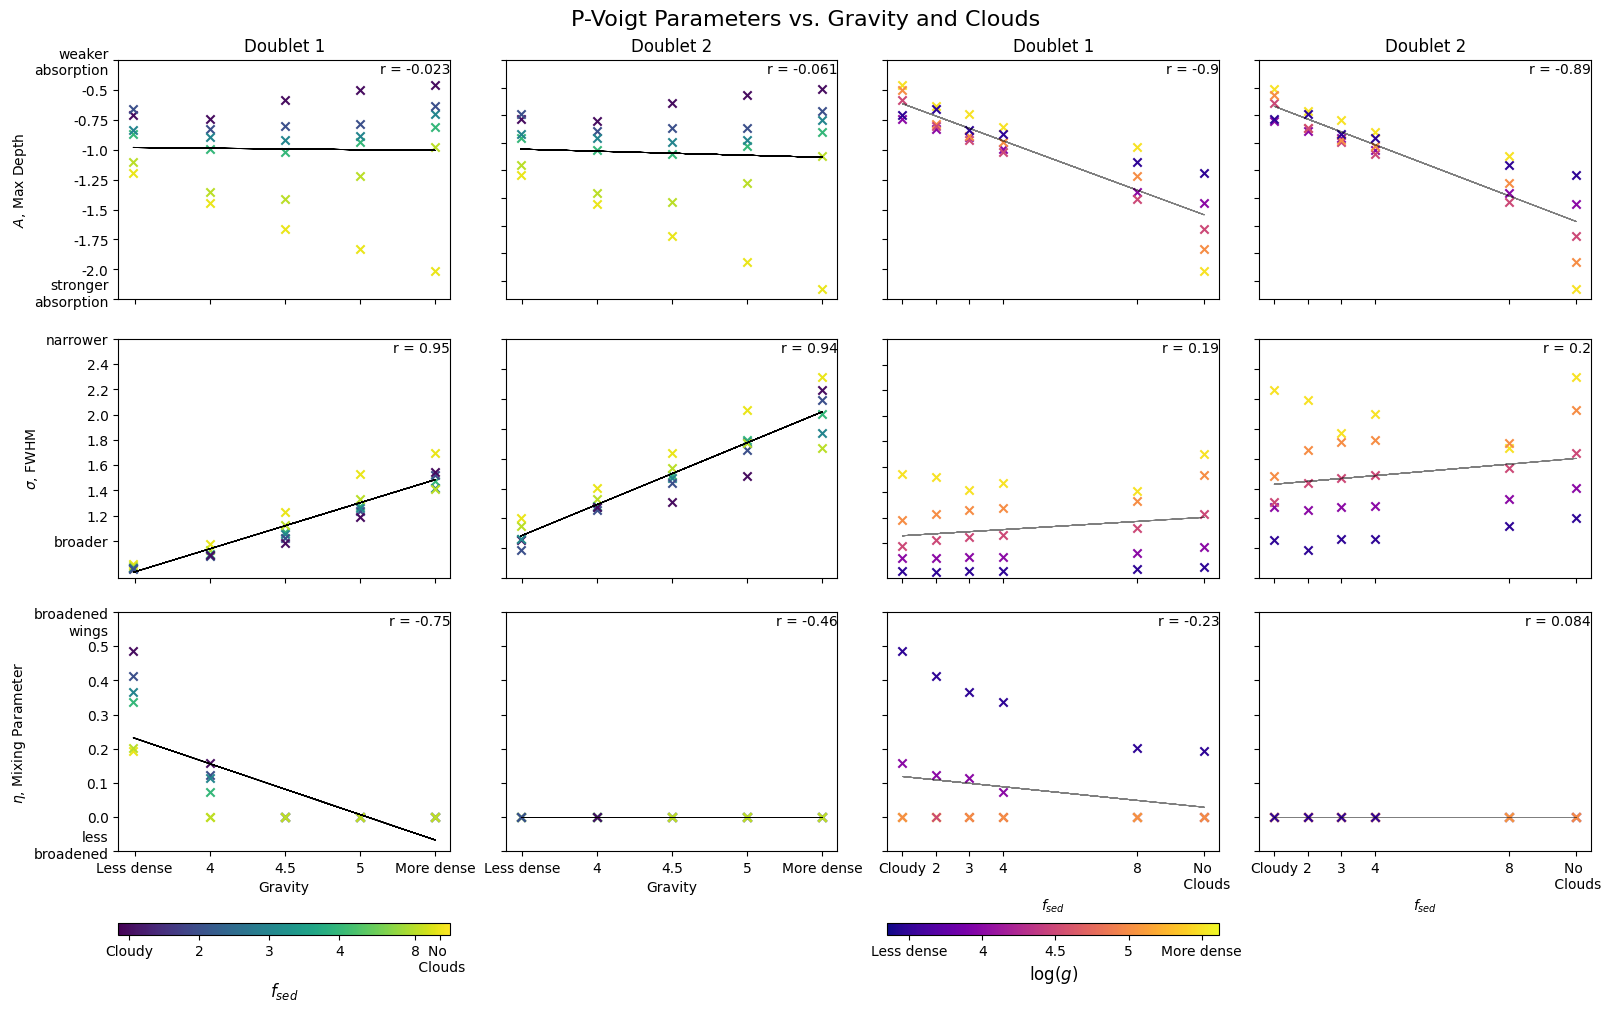

In [8]:
# plotting each doublet separately
lines_TF = False

fig = plt.figure(figsize=(16, 10), constrained_layout=True)

gs = fig.add_gridspec(4, 4, height_ratios=[
                      1, 1, 1, 0.05], width_ratios=[1, 1, 1, 1])

ax = [[fig.add_subplot(gs[i, 0]), fig.add_subplot(gs[i, 1]), fig.add_subplot(
    gs[i, 2]), fig.add_subplot(gs[i, 3])] for i in range(3)]
########################################################################################
# Plotting each data points
# A
# doublet 1
plot_parameter_vs_logg_fsed(ax[0][0], ax[0][2], df.A1,
               df.logg, df.clouds, r"$A$, Max Depth", lines = lines_TF)

# doublet 2
plot_parameter_vs_logg_fsed(ax[0][1], ax[0][3], df.A2,
               df.logg, df.clouds, r"", lines = lines_TF)


# FWHM
# doublet 1
plot_parameter_vs_logg_fsed(ax[1][0], ax[1][2], df.FWHM1,
               df.logg, df.clouds, r"$\sigma$, FWHM", lines = lines_TF)

# doublet 2
plot_parameter_vs_logg_fsed(ax[1][1], ax[1][3], df.FWHM2,
               df.logg, df.clouds, r"", lines = lines_TF)


# mixing parameter
# doublet 1
plot_parameter_vs_logg_fsed(ax[2][0], ax[2][2], df.nu1,
               df.logg, df.clouds, r"$η$, Mixing Parameter", lines = lines_TF)

# doublet 2
plot_parameter_vs_logg_fsed(ax[2][1], ax[2][3], df.nu2,
               df.logg, df.clouds, r"", lines = lines_TF)


########################################################################################
# labels along the bottom
ax[2][0].set_xlabel("Gravity")
ax[2][0].set_xticklabels(logg_ticks)
ax[2][1].set_xlabel("Gravity")
ax[2][1].set_xticklabels(logg_ticks)

ax[2][2].set_xlabel(r"$f_{sed}$")
ax[2][2].set_xticklabels(fsed_ticks)
ax[2][3].set_xlabel(r"$f_{sed}$")
ax[2][3].set_xticklabels(fsed_ticks)

########################################################################################
# labels along y axis # need to fix power
# Max depth
yticks = ax[0][0].get_yticks()
ylabel = list(yticks.copy()/1e11)
ylabel[0] = "stronger\nabsorption\n"
ylabel[-1] = "weaker\nabsorption"
ax[0][0].set_yticks(yticks)
ax[0][0].set_yticklabels(ylabel)
ax[0][1].set_yticks(yticks)  # setting ticks to none for the rest of the rows
ax[0][1].set_yticklabels([None for i in ylabel])
ax[0][2].set_yticks(yticks)
ax[0][2].set_yticklabels([None for i in ylabel])
ax[0][3].set_yticks(yticks)
ax[0][3].set_yticklabels([None for i in ylabel])

# FWHM
yticks = ax[1][1].get_yticks()
ylabel = list(np.around(yticks.copy()/1e-3, 1))
ylabel[0] = "broader"
ylabel[-1] = "narrower"
ax[1][0].set_yticks(yticks)
ax[1][0].set_yticklabels(ylabel)
ax[1][1].set_yticks(yticks)  # setting ticks to none for the rest of the rows
ax[1][1].set_yticklabels([None for i in ylabel])
ax[1][2].set_yticks(yticks)
ax[1][2].set_yticklabels([None for i in ylabel])
ax[1][3].set_yticks(yticks)
ax[1][3].set_yticklabels([None for i in ylabel])

# Mixing parameter
yticks = ax[2][0].get_yticks()
ylabel = list(np.around(yticks.copy(), 2))
ylabel[0] = "less\nbroadened\n"
ylabel[-1] = "\nbroadened\nwings"
ax[2][0].set_yticks(yticks)
ax[2][0].set_yticklabels(ylabel)
ax[2][1].set_yticks(yticks)  # setting ticks to none for the rest of the rows
ax[2][1].set_yticklabels([None for i in ylabel])
ax[2][2].set_yticks(yticks)
ax[2][2].set_yticklabels([None for i in ylabel])
ax[2][3].set_yticks(yticks)
ax[2][3].set_yticklabels([None for i in ylabel])


########################################################################################
# Colorbar
cax1 = fig.add_subplot(gs[3, 2])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                    ticks=logg_num,
                    format=mticker.FixedFormatter(logg_ticks),
                    cax=cax1, orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$\log(g)$', fontsize=12)  # empty label


cax1 = fig.add_subplot(gs[3, 0])
axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                    ticks=fsed_num,
                    format=mticker.FixedFormatter(fsed_ticks), cax=cax1,
                    orientation='horizontal')
# , shrink=1, aspect=50)
axcb.set_label(r'$f_{sed}$', fontsize=12)   # empty label

########################################################################################
# setting titles
# set doublet title
ax[0][0].set_title("Doublet 1")
ax[0][1].set_title("Doublet 2")
ax[0][2].set_title("Doublet 1")
ax[0][3].set_title("Doublet 2")
# figure title
fig.suptitle('P-Voigt Parameters vs. Gravity and Clouds', fontsize=16)

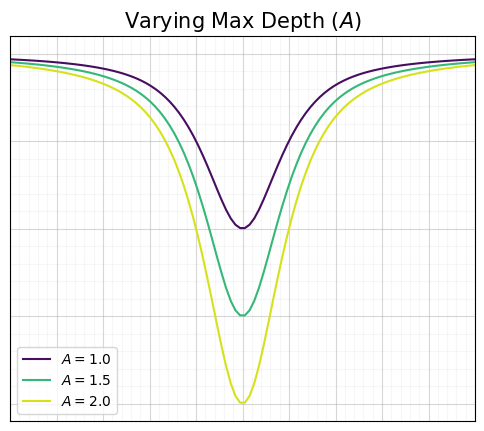

In [9]:
x = np.linspace(-5, 5, 100)
y1 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=1, mu=0)
y15 = pseudo_voigts(x, nu=0.1, A=-1.5, FWHM=1, mu=0)
y2 = pseudo_voigts(x, nu=0.1, A=-2, FWHM=1, mu=0)

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(x, y1, color=fsed_colors(norm_f(1)), label=r"$A = 1.0$")
ax.plot(x, y15, color=fsed_colors(norm_f(4)), label=r"$A = 1.5$")
ax.plot(x, y2, color=fsed_colors(norm_f(9)), label=r"$A = 2.0$")

ax.set_title(r"Varying Max Depth ($A$)", fontsize=15,
             color='k')


# setting ticks and limits
ax.set_xticks(ticks=[n for n in range(-5, 6)])
ax.set_yticks([n*0.5 for n in range(-5, 1)])
ax.set_xticklabels(['' for n in range(-5, 6)])
ax.set_yticklabels(['' for n in range(-5, 1)])
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
ax.set_xlim(-5, 5)
ax.set_ylim(-2.1, .1)

# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)
plt.legend()

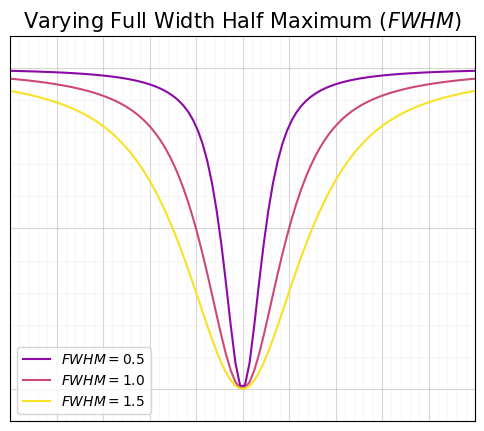

In [10]:
x = np.linspace(-5, 5, 100)
y1 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=0.5, mu=0)
y15 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=1, mu=0)
y2 = pseudo_voigts(x, nu=0.1, A=-1, FWHM=1.5, mu=0)

fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(x, y1, color=logg_colors(norm_g(4)), label=r"$FWHM = 0.5$")
ax.plot(x, y15, color=logg_colors(norm_g(4.5)), label=r"$FWHM = 1.0$")
ax.plot(x, y2, color=logg_colors(norm_g(5.5)), label=r"$FWHM = 1.5$")

ax.set_title(r"Varying Full Width Half Maximum ($FWHM$)", fontsize=15,
             color='k')


# setting ticks and limits
ax.set_xticks(ticks=[n for n in range(-5, 6)])
ax.set_yticks([n*0.5 for n in range(-5, 1)])
ax.set_xticklabels(['' for n in range(-5, 6)])
ax.set_yticklabels(['' for n in range(-5, 1)])
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
ax.set_xlim(-5, 5)
ax.set_ylim(-1.1, .1)

# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)
plt.legend()

## better way to create this plot 

In [11]:
def long_plot(df, convolve_data_dict, x_min = 1.16, x_max = 1.185, 
                  x_increment = 0.005, const_spacing = 1.5, norm_scaling = 7e10,
                  title = "Potassium Doublets", color_by_logg = True):
    """
    Plots normalized and convolved spectral data with annotations and color-coding.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the sources and their parameters.
                                   It should have columns 'name', 'logg', and 'clouds'.
    convolve_data_dict (dict): Dictionary containing convolved spectral data arrays. 
                               Keys are source names, and values are numpy arrays with shape (3, length),
                               where the first row is wavelength data and the second row is flux data.
    x_min (float, optional): Minimum x-axis value for the plot. Default is 1.16.
    x_max (float, optional): Maximum x-axis value for the plot. Default is 1.185.
    x_increment (float, optional): Increment for x-axis ticks. Default is 0.005.
    const_spacing (float, optional): Constant spacing added to each spectrum for separation in the plot. Default is 1.5.
    norm_scaling (float, optional): Scaling factor for normalizing the flux data. Default is 7e10.
    title (str, optional): Title of the plot. Default is "Potassium Doublets".
    color_by_logg (bool, optional): If True, spectra are color-coded by logg. If False, spectra are color-coded by clouds. Default is True.

    This function performs the following tasks:
    1. Sorts the sources based on 'logg' and 'clouds' and determines the plotting order.
    2. Sets up constants for vertical spacing of the spectra.
    3. Initializes a matplotlib figure and axis for plotting.
    4. Iterates over the sorted sources to:
        a. Normalize the convolved flux data.
        b. Plot each spectrum with appropriate color-coding and vertical spacing.
        c. Annotate the plot with fitted parameters.
    5. Configures plot aesthetics including x and y limits, ticks, grid lines, and axis labels.
    6. Adds potassium doublet vertical lines and annotations.
    7. Optionally adds horizontal lines and labels to indicate different clouds or logg values.
    8. Adds a color bar indicating the parameter used for color-coding.
    """
    if color_by_logg:
        index = df.sort_values(
            by=['clouds', 'logg']).index.to_numpy()  # order of spectra plotted
    else:
        index = df.sort_values(by=['logg', 'clouds']).index.to_numpy()

    label_loc_l = []  # where left label located on y axis
    label_loc_r = []  # where right label located on y axis

    if color_by_logg:
        const = [(i*const_spacing) + const_spacing*(i//5)
                for i in range(30)]  # constants to be added to flux
    else:
        const = [(i*const_spacing) + 1.5*const_spacing*(i//6) for i in range(30)]

    fig, ax = plt.subplots(figsize=(6, 16))

    # plotting each spectra
    for n, i in enumerate(index):
        # setting constants, labels, color needed
        if color_by_logg:
            color = logg_colors(norm_g(df.logg[i]))
        else:
            color = fsed_colors(norm_f(df.clouds[i]))
        name = df.name[i]
        c = const[n]

        # normalizing
        norm = (convolve_data_dict[name][1, :]) / norm_scaling

        # plotting
        ax.plot(convolve_data_dict[name][0, :], norm + c, alpha=1, color=color)

        # adding label for avg(A) and avg(FWHM)
        l_index = np.where(np.isclose(convolve_data_dict[name][0, :], x_min))[
            0][0]  # x index in spectra of left side
        r_index = np.where(np.isclose(convolve_data_dict[name][0, :], x_max))[
            0][0]  # x index in spectra of right side
        label_loc_r.append(norm[r_index] + c)   # y axis location for labels
        label_loc_l.append(norm[l_index] + c)

        A_label = f' {-df.A1[i] / 1e11:.2f}'  # string of A
        ax.annotate(A_label,
                    xy=(x_max, label_loc_r[n]), xycoords='data', color=color)
        FWHM_label = f'{df.FWHM1[i]*1e3:.2f} '  # string for FWHM
        ax.annotate(FWHM_label, horizontalalignment='right',
                    xy=(x_min, label_loc_l[n]), xycoords='data', color=color)


    # setting limits
    y_max = max(label_loc_r)+2  # right side generally larger of 2
    y_min = min(label_loc_l)-2
    # limits in x and y
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # setting ticks
    ax.set_yticks([n for n in range(int(y_min), int(y_max) + 1)])  # y-ticks
    # creating blank label in y
    ax.set_yticklabels(['' for n in range(int(y_min), int(y_max) + 1)])
    # setting x-ticks with x-increment set at top
    ax.set_xticks(ticks=[round(x_min + n*x_increment, 3)
                for n in range(0, int((x_max-x_min)/x_increment)+1)])
    # creating grid
    ax.tick_params(which='major', length=5, width=0,
                direction='in', top=True, right=True)
    ax.tick_params(which='minor', length=2, width=0,
                direction='in', top=True, right=True)
    # grid lines
    ax.minorticks_on()
    ax.grid(visible=True, which='major', alpha=.5)
    ax.grid(visible=True, which='minor', alpha=.1)


    # adding axis titles/labels
    ax.set_xlabel('Wavelength (μm)', fontsize=13)
    ax.set_ylabel("Normalized Flux + Constant\n\n", fontsize=13)
    ax.set_title(title, fontsize=13)

    # setting parameter labels
    ax.annotate(r"$avg(A)$  " "\n Max Depth  \n", xy=(x_min, y_max),
                ha='right',
                va='top',
                xycoords='data', color='k')

    ax.annotate(r"  $avg(\sigma)$" "\n  FWHM \n", xy=(1.190, y_max),
                ha='left',
                va='top',
                xycoords='data', color='k')

    # potassium vertical lines
    ax.vlines([1.16935, 1.1775], ymin=y_min, ymax=y_max-1,
            linestyle='dotted', color='k', linewidth=1.2, alpha=.8)
    ax.annotate("K I ", xy=(1.16901, y_max-1),
                xycoords='data', color='k', fontsize=12)
    ax.annotate("K I ", xy=(1.177062, y_max-1),
                xycoords='data', color='k', fontsize=12)


    # horizontal lines
    if color_by_logg:
        hline_y = [label_loc_r[(i*5)-1]+.5 for i in range(1, 7)]
        pretty_fsed = [' Cloudy \n $f_{sed} = 1$',
                    r' $f_{sed} = 2$', r' $f_{sed} = 3$',
                    r' $f_{sed} = 4$', r' $f_{sed} = 8$',
                    'No Clouds']
        ax.hlines(hline_y, xmin=x_min + 0.005, xmax=x_max,  color='k')

        for i, y in enumerate(hline_y):
            ax.annotate(pretty_fsed[i], xy=(x_min + 0.0001, y - .1),
                        xycoords='data', color='k', fontsize=9)
    else:
        hline_y = [label_loc_r[(i*6)-1]+.5 for i in range(1, 6)]
        pretty_logg = [' least dense\n'+r' $\log(g) = 3.5$',
                    r' $\log(g) = 4.0$', r' $\log(g) = 4.5$',
                    r' $\log(g) = 5.0$',
                    ' most dense \n' + r' $\log(g) = 5.5$']
        ax.hlines(hline_y, xmin=x_min + 0.006, xmax=x_max,  color='k')

        for i, y in enumerate(hline_y):
            ax.annotate(pretty_logg[i], xy=(x_min + 0.0001, y - .1),
                        xycoords='data', color='k', fontsize=9)


    # color bar
    if color_by_logg:
        axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                            ticks=logg_num, shrink=1, format=mticker.FixedFormatter(logg_ticks),
                            aspect=50,  pad=.14)
        axcb.set_label(' ', fontsize=12)  # empty label
        ax.annotate(r'$\log(g)$', xy=(.9, .5), xycoords='figure fraction',
                    rotation=270, fontsize=13)  # actual color bar label

    else:
        axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                            ticks=fsed_num, shrink=1, format=mticker.FixedFormatter(fsed_ticks),
                            aspect=50, pad=.14)
        axcb.set_label(' ', fontsize=12)  # empty label
        ax.annotate(r'$f_{sed}$', xy=(.9, .5), xycoords='figure fraction',
                    rotation=270, fontsize=13)  # actual color bar label


/var/folders/3n/2mpdtnhn1zsf6j1vr_121z5w0000gn/T/ipykernel_79833/1275867319.py:135: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),


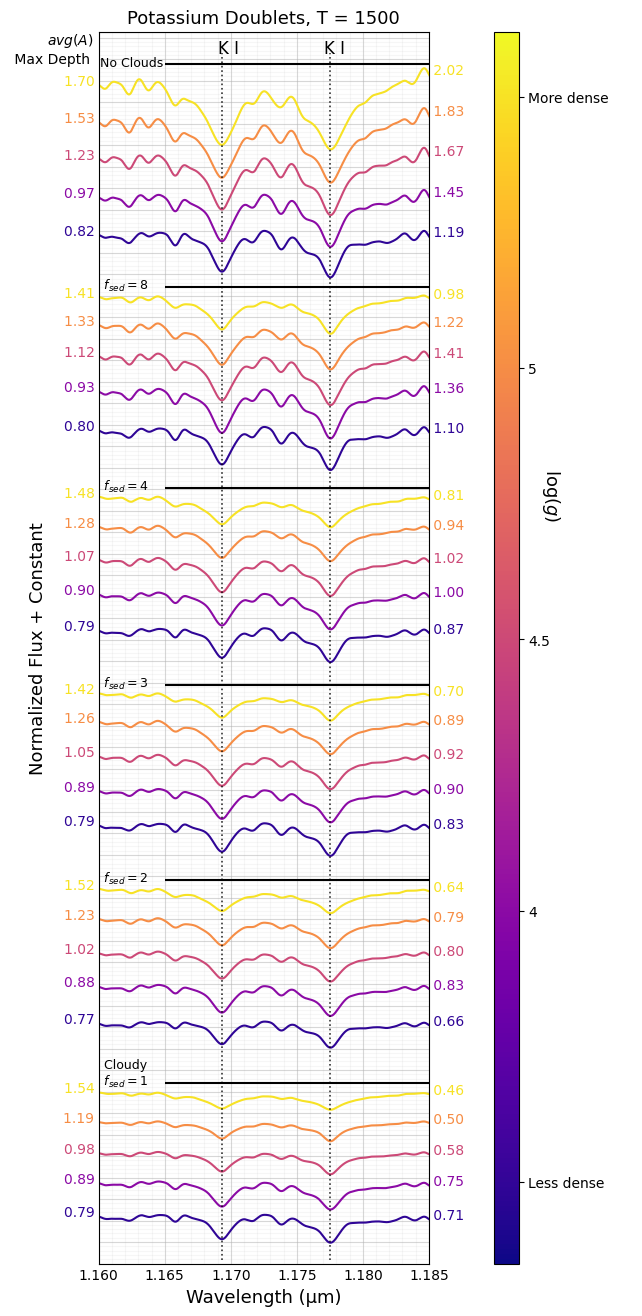

In [12]:
# variables here can easily be changed
x_min, x_max = 1.16, 1.185  # x limits used
x_increment = 0.005  # x-ticks
const_spacing = 1.5  # spacing between spectra
norm_scaling = 7e10  # constant spectra is dived by
title = "Potassium Doublets, Т = 1500"
color_by_logg = True  # if false color is by fsed

if color_by_logg:
    index = df.sort_values(
        by=['clouds', 'logg']).index.to_numpy()  # order of spectra plotted
else:
    index = df.sort_values(by=['logg', 'clouds']).index.to_numpy()

label_loc_l = []  # where left label located on y axis
label_loc_r = []  # where right label located on y axis

if color_by_logg:
    const = [(i*const_spacing) + const_spacing*(i//5)
             for i in range(30)]  # constants to be added to flux
else:
    const = [(i*const_spacing) + 1.5*const_spacing*(i//6) for i in range(30)]

fig, ax = plt.subplots(figsize=(6, 16))

# plotting each spectra
for n, i in enumerate(index):
    # setting constants, labels, color needed
    if color_by_logg:
        color = logg_colors(norm_g(df.logg[i]))
    else:
        color = fsed_colors(norm_f(df.clouds[i]))
    name = df.name[i]
    c = const[n]

    # normalizing
    norm = (convolve_data_dict[name][1, :]) / norm_scaling

    # plotting
    ax.plot(convolve_data_dict[name][0, :], norm + c, alpha=1, color=color)

    # adding label for avg(A) and avg(FWHM)
    l_index = np.where(np.isclose(convolve_data_dict[name][0, :], x_min))[
        0][0]  # x index in spectra of left side
    r_index = np.where(np.isclose(convolve_data_dict[name][0, :], x_max))[
        0][0]  # x index in spectra of right side
    label_loc_r.append(norm[r_index] + c)   # y axis location for labels
    label_loc_l.append(norm[l_index] + c)

    A_label = f' {-df.A1[i] / 1e11:.2f}'  # string of A
    ax.annotate(A_label,
                xy=(x_max, label_loc_r[n]), xycoords='data', color=color)
    FWHM_label = f'{df.FWHM1[i]*1e3:.2f} '  # string for FWHM
    ax.annotate(FWHM_label, horizontalalignment='right',
                xy=(x_min, label_loc_l[n]), xycoords='data', color=color)


# setting limits
y_max = max(label_loc_r)+2  # right side generally larger of 2
y_min = min(label_loc_l)-2
# limits in x and y
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# setting ticks
ax.set_yticks([n for n in range(int(y_min), int(y_max) + 1)])  # y-ticks
# creating blank label in y
ax.set_yticklabels(['' for n in range(int(y_min), int(y_max) + 1)])
# setting x-ticks with x-increment set at top
ax.set_xticks(ticks=[round(x_min + n*x_increment, 3)
              for n in range(0, int((x_max-x_min)/x_increment)+1)])
# creating grid
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)


# adding axis titles/labels
ax.set_xlabel('Wavelength (μm)', fontsize=13)
ax.set_ylabel("Normalized Flux + Constant\n\n", fontsize=13)
ax.set_title(title, fontsize=13)

# setting parameter labels
ax.annotate(r"$avg(A)$  " "\n Max Depth  \n", xy=(x_min, y_max),
            ha='right',
            va='top',
            xycoords='data', color='k')

ax.annotate(r"  $avg(\sigma)$" "\n  FWHM \n", xy=(1.190, y_max),
            ha='left',
            va='top',
            xycoords='data', color='k')

# potassium vertical lines
ax.vlines([1.16935, 1.1775], ymin=y_min, ymax=y_max-1,
          linestyle='dotted', color='k', linewidth=1.2, alpha=.8)
ax.annotate("K I ", xy=(1.16901, y_max-1),
            xycoords='data', color='k', fontsize=12)
ax.annotate("K I ", xy=(1.177062, y_max-1),
            xycoords='data', color='k', fontsize=12)


# horizontal lines
if color_by_logg:
    hline_y = [label_loc_r[(i*5)-1]+.5 for i in range(1, 7)]
    pretty_fsed = [' Cloudy \n $f_{sed} = 1$',
                   r' $f_{sed} = 2$', r' $f_{sed} = 3$',
                   r' $f_{sed} = 4$', r' $f_{sed} = 8$',
                   'No Clouds']
    ax.hlines(hline_y, xmin=x_min + 0.005, xmax=x_max,  color='k')

    for i, y in enumerate(hline_y):
        ax.annotate(pretty_fsed[i], xy=(x_min + 0.0001, y - .1),
                    xycoords='data', color='k', fontsize=9)
else:
    hline_y = [label_loc_r[(i*6)-1]+.5 for i in range(1, 6)]
    pretty_logg = [' least dense\n'+r' $\log(g) = 3.5$',
                   r' $\log(g) = 4.0$', r' $\log(g) = 4.5$',
                   r' $\log(g) = 5.0$',
                   ' most dense \n' + r' $\log(g) = 5.5$']
    ax.hlines(hline_y, xmin=x_min + 0.006, xmax=x_max,  color='k')

    for i, y in enumerate(hline_y):
        ax.annotate(pretty_logg[i], xy=(x_min + 0.0001, y - .1),
                    xycoords='data', color='k', fontsize=9)


# color bar
if color_by_logg:
    axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                        ticks=logg_num, shrink=1, format=mticker.FixedFormatter(logg_ticks),
                        aspect=50,  pad=.14)
    axcb.set_label(' ', fontsize=12)  # empty label
    ax.annotate(r'$\log(g)$', xy=(.9, .5), xycoords='figure fraction',
                rotation=270, fontsize=13)  # actual color bar label

else:
    axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                        ticks=fsed_num, shrink=1, format=mticker.FixedFormatter(fsed_ticks),
                        aspect=50, pad=.14)
    axcb.set_label(' ', fontsize=12)  # empty label
    ax.annotate(r'$f_{sed}$', xy=(.9, .5), xycoords='figure fraction',
                rotation=270, fontsize=13)  # actual color bar label

plt.savefig('long_plot_logg.png')

/var/folders/3n/2mpdtnhn1zsf6j1vr_121z5w0000gn/T/ipykernel_79833/3472847520.py:144: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),


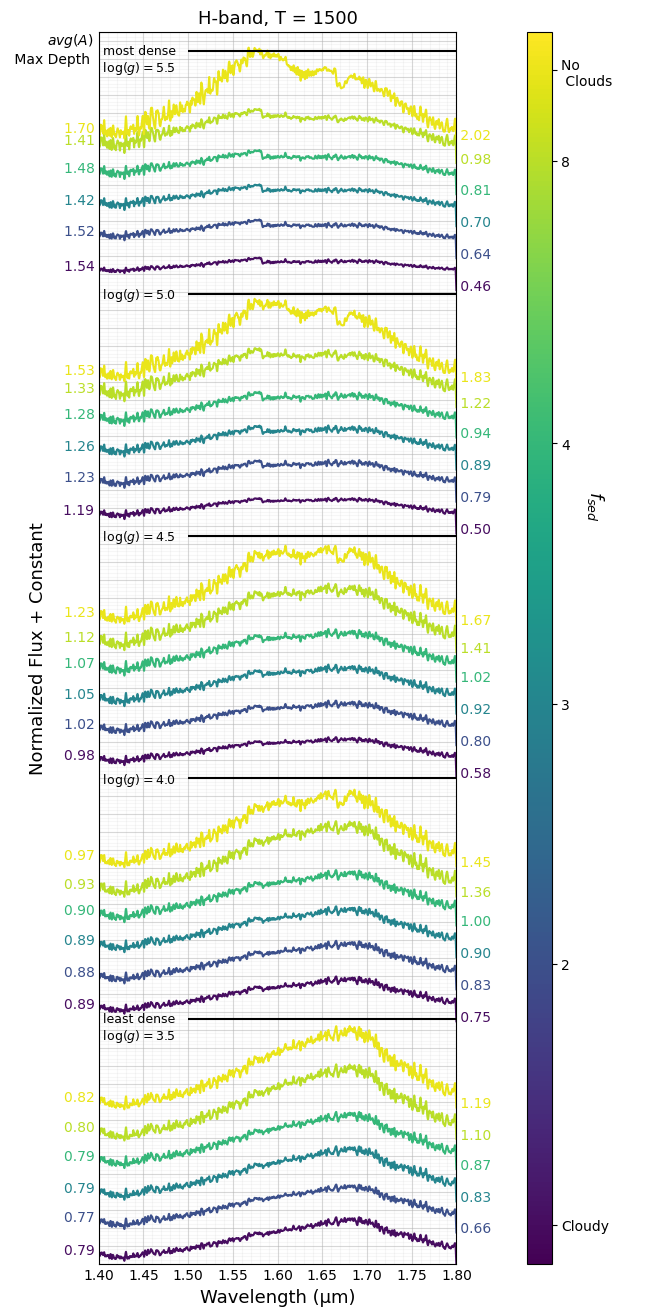

In [13]:
# variables here can easily be changed
x_min, x_max = 1.4, 1.8  # x limits used
x_increment = 0.05  # x-ticks
const_spacing = 1.8  # spacing between spectra
norm_scaling = 5e10  # constant spectra is dived by
title = "H-band, Т = 1500"
color_by_logg = False  # if false color is by fsed

if color_by_logg:
    index = df.sort_values(
        by=['clouds', 'logg']).index.to_numpy()  # order of spectra plotted
else:
    index = df.sort_values(by=['logg', 'clouds']).index.to_numpy()

label_loc_l = []  # where left label located on y axis
label_loc_r = []  # where right label located on y axis

if color_by_logg:
    const = [(i*const_spacing) + 1.5*const_spacing*(i//5)
             for i in range(30)]  # constants to be added to flux
else:
    const = [(i*const_spacing) + 1.5*const_spacing*(i//6) for i in range(30)]

fig, ax = plt.subplots(figsize=(6.5, 16))

# plotting each spectra
for n, i in enumerate(index):
    # setting constants, labels, color needed
    if color_by_logg:
        color = logg_colors(norm_g(df.logg[i]))
    else:
        color = fsed_colors(norm_f(df.clouds[i]))
    name = df.name[i]
    c = const[n]

    # normalizing
    norm = (convolve_data_dict[name][1, :]) / norm_scaling

    # plotting
    ax.plot(convolve_data_dict[name][0, :], norm + c, alpha=1, color=color)

    # adding label for avg(A) and avg(FWHM)
    l_index = np.where(np.isclose(convolve_data_dict[name][0, :], x_min))[
        0][0]  # x index in spectra of left side
    r_index = np.where(np.isclose(convolve_data_dict[name][0, :], x_max))[
        0][0]  # x index in spectra of right side
    label_loc_r.append(norm[r_index] + c)   # y axis location for labels
    label_loc_l.append(norm[l_index] + c)

    A_label = f' {-df.A1[i] / 1e11:.2f}'  # string of A
    ax.annotate(A_label,
                xy=(x_max, label_loc_r[n]), xycoords='data', color=color)
    FWHM_label = f'{df.FWHM1[i]*1e3:.2f} '  # string for FWHM
    ax.annotate(FWHM_label, horizontalalignment='right',
                xy=(x_min, label_loc_l[n]), xycoords='data', color=color)


# setting limits
y_max = max(label_loc_r)+6  # right side generally larger of 2
y_min = min(label_loc_l)-0
# limits in x and y
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# setting ticks
ax.set_yticks([n for n in range(int(y_min), int(y_max) + 1)])  # y-ticks
# creating blank label in y
ax.set_yticklabels(['' for n in range(int(y_min), int(y_max) + 1)])
# setting x-ticks with x-increment set at top
ax.set_xticks(ticks=[round(x_min + n*x_increment, 3)
              for n in range(0, int((x_max-x_min)/x_increment)+1)])
# creating grid
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)


# adding axis titles/labels
ax.set_xlabel('Wavelength (μm)', fontsize=13)
ax.set_ylabel("Normalized Flux + Constant\n\n", fontsize=13)
ax.set_title(title, fontsize=13)

# setting parameter labels
ax.annotate(r"$avg(A)$  " "\n Max Depth  \n", xy=(x_min, y_max),
            ha='right',
            va='top',
            xycoords='data', color='k')

ax.annotate(r"  $avg(\sigma)$" "\n  FWHM \n", xy=(1.190, y_max),
            ha='left',
            va='top',
            xycoords='data', color='k')

# potassium vertical lines
ax.vlines([1.16935, 1.1775], ymin=y_min, ymax=y_max-1,
          linestyle='dotted', color='k', linewidth=1.2, alpha=.8)
ax.annotate("K I ", xy=(1.16901, y_max-1),
            xycoords='data', color='k', fontsize=12)
ax.annotate("K I ", xy=(1.177062, y_max-1),
            xycoords='data', color='k', fontsize=12)


# horizontal lines

if color_by_logg:
    hline_y = [label_loc_r[(i*5)-1]+3.5 for i in range(1, 7)]
    pretty_fsed = [' Cloudy \n $f_{sed} = 1$',  r' $f_{sed} = 2$', r' $f_{sed} = 3$',
                   r' $f_{sed} = 4$', r' $f_{sed} = 8$', 'No Clouds']
    ax.hlines(hline_y, xmin=x_min + 0.08, xmax=x_max,  color='k')

    for i, y in enumerate(hline_y):
        ax.annotate(pretty_fsed[i], xy=(x_min + 0.0001, y + .5),
                    xycoords='data', color='k', fontsize=9,
                    ha='left', va='top')
else:
    hline_y = [label_loc_r[(i*6)-1] + 4.9 for i in range(1, 6)]
    pretty_logg = [' least dense\n'+r' $\log(g) = 3.5$',
                   r' $\log(g) = 4.0$', r' $\log(g) = 4.5$',
                   r' $\log(g) = 5.0$',
                   ' most dense \n' + r' $\log(g) = 5.5$']
    ax.hlines(hline_y, xmin=x_min + 0.1, xmax=x_max,  color='k')

    for i, y in enumerate(hline_y):
        ax.annotate(pretty_logg[i], xy=(x_min + 0.00001, y + .4),
                    xycoords='data', color='k', fontsize=9,
                    ha='left', va='top')


# color bar
if color_by_logg:
    axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                        ticks=logg_num, shrink=1, format=mticker.FixedFormatter(logg_ticks),
                        aspect=50,  pad=.14)
    axcb.set_label(' ', fontsize=12)  # empty label
    ax.annotate(r'$\log(g)$', xy=(.9, .5), xycoords='figure fraction',
                rotation=270, fontsize=13)  # actual color bar label

else:
    axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                        ticks=fsed_num, shrink=1, format=mticker.FixedFormatter(fsed_ticks),
                        aspect=50, pad=.14)
    axcb.set_label(' ', fontsize=12)  # empty label
    ax.annotate(r'$f_{sed}$', xy=(.9, .5), xycoords='figure fraction',
                rotation=270, fontsize=13)  # actual color bar label

# plt.savefig('long_plot_fsed_H-band.png')

/var/folders/3n/2mpdtnhn1zsf6j1vr_121z5w0000gn/T/ipykernel_79833/3277541462.py:145: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),


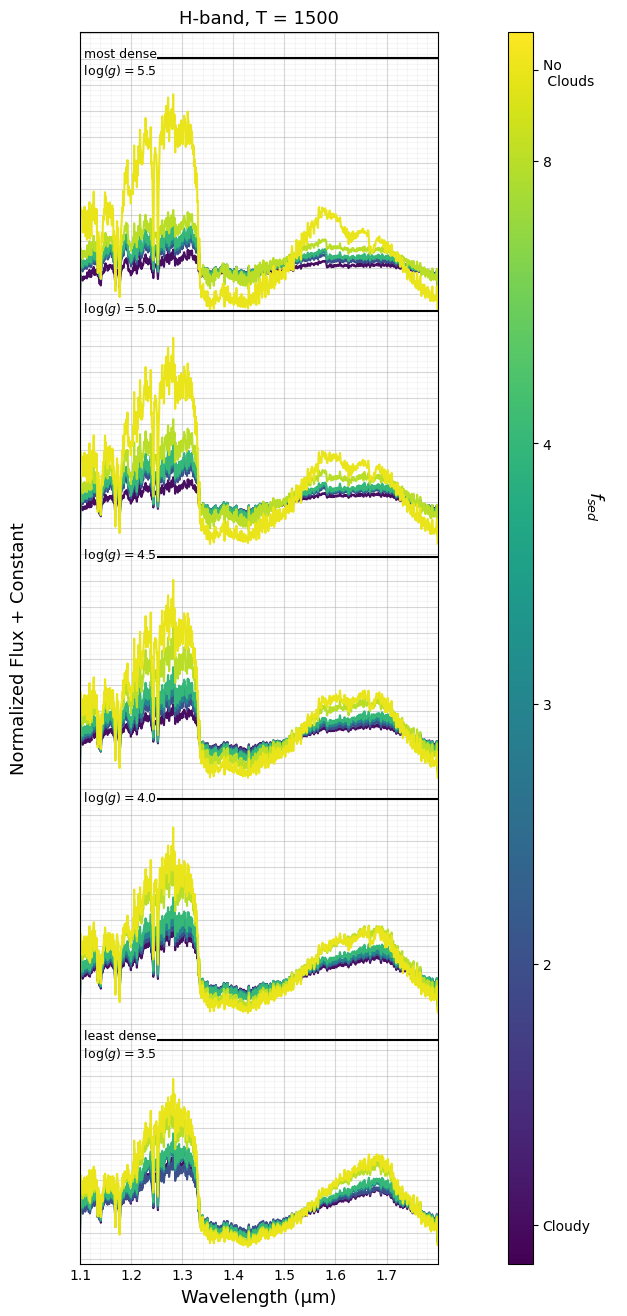

In [14]:
#overlaid version

# variables here can easily be changed
x_min, x_max = 1.1, 1.8  # x limits used
x_increment = 0.1  # x-ticks
const_spacing = 6  # spacing between spectra
norm_scaling = 6.5e10  # constant spectra is dived by
title = "H-band, Т = 1500"
color_by_logg = False  # if false color is by fsed

if color_by_logg:
    index = df.sort_values(
        by=['clouds', 'logg']).index.to_numpy()  # order of spectra plotted
else:
    index = df.sort_values(by=['logg', 'clouds']).index.to_numpy()

label_loc_l = []  # where left label located on y axis
label_loc_r = []  # where right label located on y axis

if color_by_logg:
    const = [ 1.5*const_spacing*(i//5)
             for i in range(30)]  # constants to be added to flux
else:
    const = [1.5*const_spacing*(i//6) for i in range(30)]

fig, ax = plt.subplots(figsize=(6.5, 16))

# plotting each spectra
for n, i in enumerate(index):
    # setting constants, labels, color needed
    if color_by_logg:
        color = logg_colors(norm_g(df.logg[i]))
    else:
        color = fsed_colors(norm_f(df.clouds[i]))
    name = df.name[i]
    c = const[n]

    # normalizing
    norm = (convolve_data_dict[name][1, :]) / norm_scaling

    # plotting
    ax.plot(convolve_data_dict[name][0, :], norm + c, alpha=1, color=color)

    # These are arbitary since no labels choosen to get limits set better
    l_index = np.where(np.isclose(convolve_data_dict[name][0, :], 1.4))[0][0]  # x index in spectra of left side
    r_index = np.where(np.isclose(convolve_data_dict[name][0, :], 1.3))[0][0]  # x index in spectra of right side
    label_loc_r.append(norm[r_index] + c)   # y axis location for labels
    label_loc_l.append(norm[l_index] + c)

    # A_label = f' {-df.A1[i] / 1e11:.2f}'  # string of A
    # ax.annotate(A_label,
    #             xy=(x_max, label_loc_r[n]), xycoords='data', color=color)
    # FWHM_label = f'{df.FWHM1[i]*1e3:.2f} '  # string for FWHM
    # ax.annotate(FWHM_label, horizontalalignment='right',
    #             xy=(x_min, label_loc_l[n]), xycoords='data', color=color)


# setting limits
y_max = max(label_loc_r)+ 4  # right side generally larger of 2
y_min = min(label_loc_l)-1
# limits in x and y
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# setting ticks
ax.set_yticks([n for n in range(int(y_min), int(y_max) + 1)])  # y-ticks
# creating blank label in y
ax.set_yticklabels(['' for n in range(int(y_min), int(y_max) + 1)])
# setting x-ticks with x-increment set at top
ax.set_xticks(ticks=[round(x_min + n*x_increment, 3)
              for n in range(0, int((x_max-x_min)/x_increment)+1)])
# creating grid
ax.tick_params(which='major', length=5, width=0,
               direction='in', top=True, right=True)
ax.tick_params(which='minor', length=2, width=0,
               direction='in', top=True, right=True)
# grid lines
ax.minorticks_on()
ax.grid(visible=True, which='major', alpha=.5)
ax.grid(visible=True, which='minor', alpha=.1)


# adding axis titles/labels
ax.set_xlabel('Wavelength (μm)', fontsize=13)
ax.set_ylabel("Normalized Flux + Constant\n\n", fontsize=13)
ax.set_title(title, fontsize=13)

# # setting parameter labels
# ax.annotate(r"$avg(A)$  " "\n Max Depth  \n", xy=(x_min, y_max),
#             ha='right',
#             va='top',
#             xycoords='data', color='k')

# ax.annotate(r"  $avg(\sigma)$" "\n  FWHM \n", xy=(1.190, y_max),
#             ha='left',
#             va='top',
#             xycoords='data', color='k')

# # potassium vertical lines
# ax.vlines([1.16935, 1.1775], ymin=y_min, ymax=y_max-1,
#           linestyle='dotted', color='k', linewidth=1.2, alpha=.8)
# ax.annotate("K I ", xy=(1.16901, y_max-1),
#             xycoords='data', color='k', fontsize=12)
# ax.annotate("K I ", xy=(1.177062, y_max-1),
#             xycoords='data', color='k', fontsize=12)


# horizontal lines

if color_by_logg:  
    # 1.5*const_spacing
    hline_y = [label_loc_r[(i*5)-1] + const_spacing/2 for i in range(1, 7)]
    pretty_fsed = [' Cloudy \n $f_{sed} = 1$',  r' $f_{sed} = 2$', r' $f_{sed} = 3$',
                   r' $f_{sed} = 4$', r' $f_{sed} = 8$', 'No Clouds']
    ax.hlines(hline_y, xmin=x_min + 0.1, xmax=x_max,  color='k')

    for i, y in enumerate(hline_y):
        ax.annotate(pretty_fsed[i], xy=(x_min + 0.0001, y + .5),
                    xycoords='data', color='k', fontsize=9,
                    ha='left', va='top')
else:
    hline_y = [label_loc_r[(i*6)-1] + const_spacing/2 for i in range(1, 6)]
    pretty_logg = [' least dense\n'+r' $\log(g) = 3.5$',
                   r' $\log(g) = 4.0$', r' $\log(g) = 4.5$',
                   r' $\log(g) = 5.0$',
                   ' most dense \n' + r' $\log(g) = 5.5$']
    ax.hlines(hline_y, xmin=x_min + 0.15, xmax=x_max,  color='k')

    for i, y in enumerate(hline_y):
        ax.annotate(pretty_logg[i], xy=(x_min + 0.00001, y + .4),
                    xycoords='data', color='k', fontsize=9,
                    ha='left', va='top')


# color bar
if color_by_logg:
    axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_g, cmap=logg_colors),
                        ticks=logg_num, shrink=1, format=mticker.FixedFormatter(logg_ticks),
                        aspect=50,  pad=.14)
    axcb.set_label(' ', fontsize=12)  # empty label
    ax.annotate(r'$\log(g)$', xy=(.9, .5), xycoords='figure fraction',
                rotation=270, fontsize=13)  # actual color bar label

else:
    axcb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_f, cmap=fsed_colors),
                        ticks=fsed_num, shrink=1, format=mticker.FixedFormatter(fsed_ticks),
                        aspect=50, pad=.14)
    axcb.set_label(' ', fontsize=12)  # empty label
    ax.annotate(r'$f_{sed}$', xy=(.9, .5), xycoords='figure fraction',
                rotation=270, fontsize=13)  # actual color bar label

plt.savefig('overlay_fsed_H-band.png')